# SUPPORT VECTOR REGRESSION - SVR

## Importar librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Leer dataset

In [2]:
df = pd.read_csv("C:/Users/Alex/Desktop/R/machine learning/0.dataset/Position_Salaries.csv")
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [16]:
# X = df.drop("Level",axis=1)
X = df.iloc[:, 1:2].values # extrayendo valores como array de np
y = df["Salary"].values

## Escalar datos

In [106]:
from sklearn.preprocessing import StandardScaler

x_scaler = StandardScaler()
X = x_scaler.fit_transform(X)

y_scaler = StandardScaler()
y = y_scaler.fit_transform(y.reshape(-1,1))

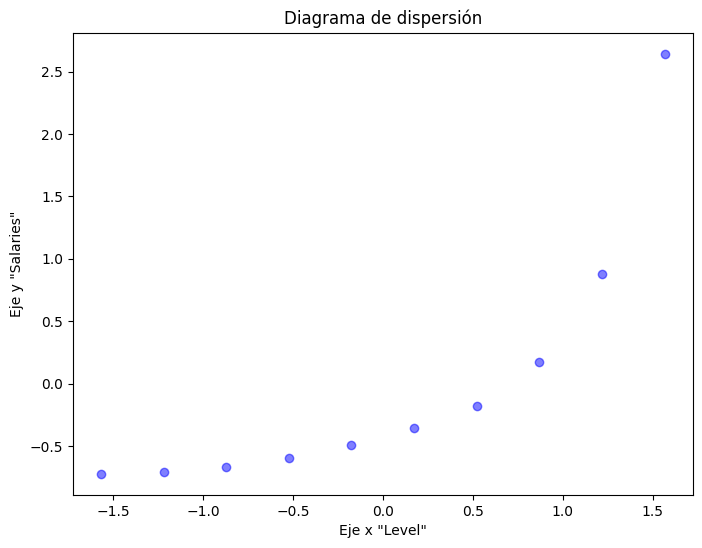

In [107]:
# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, color='blue', alpha=0.5)

# Personalizamos el gráfico
ax.set_xlabel('Eje x "Level"')
ax.set_ylabel('Eje y "Salaries"')
ax.set_title('Diagrama de dispersión')

# Mostramos el gráfico
plt.show()

In [17]:
"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
"""

## Crear el modelo

In [108]:
from sklearn.svm import SVR
model = SVR(kernel="rbf") # crear el modelo
model.fit(X, y) # entrenar el modelo

c:\Users\Alex\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [109]:
y_pred = model.predict(X)

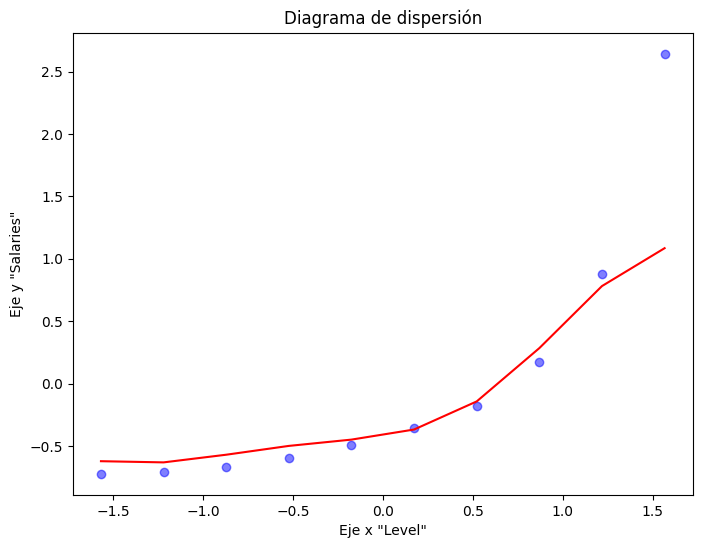

In [110]:
# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color = "red") # graficar la recta de prediccion

# Personalizamos el gráfico
ax.set_xlabel('Eje x "Level"')
ax.set_ylabel('Eje y "Salaries"')
ax.set_title('Diagrama de dispersión')

# Mostramos el gráfico
plt.show()

## predecir

In [111]:
val = np.array([6.5]).reshape(-1,1)
val_transf = x_scaler.transform(val) # usar transform
new_y_pred = model.predict(val_transf)

In [112]:
y_scaler.inverse_transform(new_y_pred.reshape(-1,1))

array([[0.01158103]])

In [113]:
X = x_scaler.inverse_transform(X)
y = y_scaler.inverse_transform(y)
y_pred = y_scaler.inverse_transform([y_pred])

In [ ]:
# Creamos el gráfico
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(X, y, color='blue', alpha=0.5)
plt.plot(X, y_pred, color = "red") # graficar la recta de prediccion

# Personalizamos el gráfico
ax.set_xlabel('Eje x "Level"')
ax.set_ylabel('Eje y "Salaries"')
ax.set_title('Diagrama de dispersión')

# Mostramos el gráfico
plt.show()